In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [42]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 610M/612M [00:04<00:00, 147MB/s]
100% 612M/612M [00:04<00:00, 152MB/s]


In [0]:
!unzip \*.zip  && rm *.zip
!ls

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
print("[INFO] Data loading..")
Raw_train = pd.read_csv('Train.csv')
Raw_test = pd.read_csv('Test.csv')


Raw_train = Raw_train.sample(frac=1)



trainX = []
trainY = []
testX  = []
testY  = []

img_hight = 32
img_width = 32

for path in Raw_train['Path']:
    temp = plt.imread(path)
    temp = cv2.resize(temp, (img_hight, img_width), interpolation=cv2.INTER_NEAREST)
    trainX.append(temp)

for ID in Raw_train['ClassId']:
    trainY.append(ID)

for path in Raw_test['Path']:
    temp = plt.imread(path)
    temp = cv2.resize(temp, (img_hight, img_width), interpolation=cv2.INTER_NEAREST)
    testX.append(temp)

for ID in Raw_test['ClassId']:
    testY.append(ID)

trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)




print("[INFO] Train Data shape" + str(trainX.shape))
print("[INFO] Test  Data shape" + str(testX.shape))



[INFO] Data loading..
[INFO] Train Data shape(39209, 32, 32, 3)
[INFO] Test  Data shape(12630, 32, 32, 3)


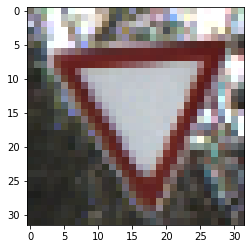

In [3]:
plt.imshow(trainX[222])


In [0]:
def preprocess_img(X):
    X = np.float32(X)
    # standardize features
    X -= np.mean(X, axis=0)
    X /= (np.std(X, axis=0) + np.finfo('float32').eps)

    return X

In [0]:
trainX = preprocess_img(trainX)
testX  = preprocess_img(testX)


In [0]:
tf.keras.backend.clear_session()  # For easy reset of notebook state.


inputs = keras.Input(shape=(img_hight,img_width, 3))
x = layers.Conv2D(32, kernel_size=(5,5), padding='same', activation='relu')(inputs)
x = layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D((2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D((2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D((2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(43, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

In [0]:


model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit(trainX, trainY,
                    batch_size=64,
                    epochs=30,
                    validation_split=0.2)


In [8]:
model.evaluate(testX,  testY, verbose=2)


395/395 - 1s - loss: 0.3008 - accuracy: 0.9325


[0.3008435368537903, 0.93254154920578]